데이터셋 나누기(훈련데이터셋 / 테스트 데이터셋)

In [7]:
import pandas as pd
df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data',header=None)
df_wine.columns=['Class label', 'Alcohol', 'Malic acid', 'Ash',
                   'Alcalinity of ash', 'Magnesium', 'Total phenols',
                   'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins',
                   'Color intensity', 'Hue', 'OD280/OD315 of diluted wines',
                   'Proline']
df_wine['Class label'].value_counts()

2    71
1    59
3    48
Name: Class label, dtype: int64

In [9]:
df_wine.head()

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [12]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test =  train_test_split( df_wine.iloc[:,1:], df_wine.iloc[:,0], test_size=0.3,random_state=0,stratify=df_wine.iloc[:,0] )

특성 스케일 맞추기

In [14]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
X_train_norm = mms.fit_transform(X_train)
X_test_norm = mms.transform(X_test)

In [15]:
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

In [18]:
import numpy as np
#표준화
ex = np.array([0,1,2,3,4,5])
print('standardized : ',(ex - ex.mean()) / ex.std()  ) # 이상치에 덜 민감하다

#정규화
print('normalized : ',(ex-ex.min())/(ex.max()-ex.min())  )  # 이상치에 민감하다

standardized :  [-1.46385011 -0.87831007 -0.29277002  0.29277002  0.87831007  1.46385011]
normalized :  [0.  0.2 0.4 0.6 0.8 1. ]


In [19]:
from sklearn.preprocessing import RobustScaler
rbs = RobustScaler()
X_train_robust = rbs.fit_transform(X_train)
X_test_robust = rbs.transform(X_test)

In [20]:
# np.percentile 4분위수 구할때 사용
# np.percentile(ex,50) 중위수
# np.percentile(ex,75) 3Q 3/4
(ex - np.percentile(ex,50)) / (np.percentile(ex,75) - np.percentile(ex,25) ) # 전대적으로 이상치에 영향이 없다.

array([-1. , -0.6, -0.2,  0.2,  0.6,  1. ])

In [22]:
ex, np.percentile(ex,50)

(array([0, 1, 2, 3, 4, 5]), 2.5)

In [23]:
from sklearn.preprocessing import MaxAbsScaler
mas = MaxAbsScaler()
X_train_maxabs = mas.fit_transform(X_train)
X_test_maxabs = mas.transform(X_test)

In [24]:
ex / np.max(np.abs(ex))

array([0. , 0.2, 0.4, 0.6, 0.8, 1. ])

In [29]:
ex[1:],ex[1:]**2
ex_2f = np.vstack((ex[1:],ex[1:]**2))

In [33]:
l2_norm = np.sqrt(np.sum(ex_2f**2,axis=1))
print(l2_norm)
ex_2f / l2_norm.reshape(-1,1)

[ 7.41619849 31.28897569]


array([[0.13483997, 0.26967994, 0.40451992, 0.53935989, 0.67419986],
       [0.03196014, 0.12784055, 0.28764125, 0.51136222, 0.79900347]])

In [36]:
l1_norm = np.sum(np.abs(ex_2f),axis=1)
print(l1_norm)
ex_2f / l1_norm.reshape(-1,1)

[15 55]


array([[0.06666667, 0.13333333, 0.2       , 0.26666667, 0.33333333],
       [0.01818182, 0.07272727, 0.16363636, 0.29090909, 0.45454545]])

In [37]:
max_norm = np.max(np.abs(ex_2f),axis=1)
print(max_norm)
ex_2f / max_norm.reshape(-1,1)

[ 5 25]


array([[0.2 , 0.4 , 0.6 , 0.8 , 1.  ],
       [0.04, 0.16, 0.36, 0.64, 1.  ]])

모델 복잡도 제한을 위한  L1 규제와 L2 규제
  - L2(Ridge 규제의 기하학적 해석)
  - L2 규제는 가중치의 제곱합을 최소화하도록 합니다.
    - 기하학적으로 L2 규제는 모델의 가중치 벡터를 고려할 때, 가중치 공간에서 각 가중치의 제곱에 비례하는 원을 최소화하는 것으로 해석될 수 있습니다.
    이러한 접근은 **가중치를 완전히 0으로 만들지 않고 작게 만들어서 모든 특성을 고려하도록 유지**합니다.
  - L2 규제는 모든 특성을 고려하여 과적합을 방지하는 데 도움이 됩니다. 또한, L2 규제는 **가중치 값이 커지는 것을 제한하므로 모델의 안정성을 향상**시키는 데 기여합니다.

In [43]:
from IPython.display import Image

In [44]:
Image(url='https://raw.githubusercontent.com/rickiepark/ml-with-pytorch/main/ch04/figures/04_05.png', width=500)

In [48]:
Image(url='https://raw.githubusercontent.com/rickiepark/ml-with-pytorch/main/ch04/figures/04_06.png', width=500)

L1(Lasso 규제) 규제를 사용한 희소성
  - L1 규제는 가중치의 절대값의 합을 최소화하도록 합니다.
  - 기하학적으로 L1 규제는 모델의 가중치 벡터를 고려할 때, 가중치 공간에서 각 가중치의 절대값에 비례하는 사각형 영역을 최소화하는 것으로 해석될 수 있습니다.
  - 이러한 접근은 가중치 벡터의 일부를 정확히 0으로 만들어 특성 선택을 수행하며, 이는 **모델의 특성을 제거하거나 희소하게 만드는 데 사용**됩니다.
따라서 L1 규제는 **희소한 모델을 생성하고 해석력을 향상**시키는데 도움이 됩니다.

In [49]:
Image(url='https://raw.githubusercontent.com/rickiepark/ml-with-pytorch/main/ch04/figures/04_07.png', width=500)

표준화된  wine 데이터에 적용

In [51]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(penalty='l1', C=1.0, solver='liblinear', multi_class='ovr')
# 규제를 높이거나 낮추려면 C값을 증가시키거나 감소
lr.fit(X_train_std, y_train)
lr.score(X_train_std,y_train), lr.score(X_test_std,y_test)

(1.0, 1.0)

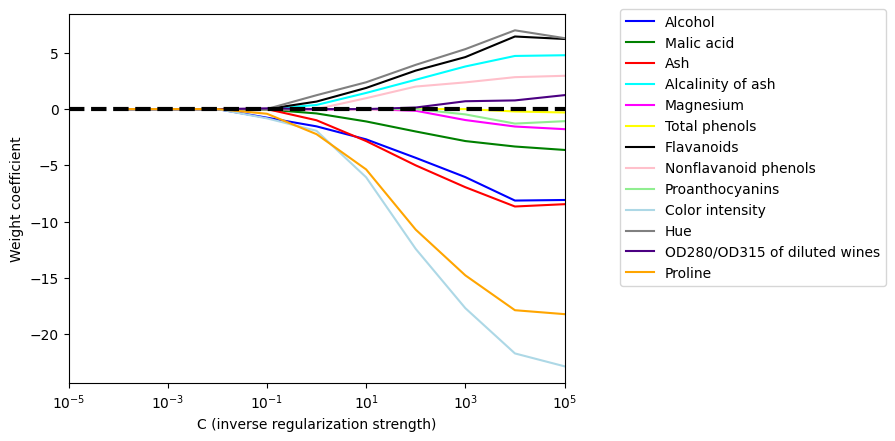

In [52]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = plt.subplot(111)

colors = ['blue', 'green', 'red', 'cyan',
          'magenta', 'yellow', 'black',
          'pink', 'lightgreen', 'lightblue',
          'gray', 'indigo', 'orange']

weights, params = [], []
for c in np.arange(-4., 6.):
    lr = LogisticRegression(penalty='l1', C=10.**c, solver='liblinear',
                            multi_class='ovr', random_state=0)
    lr.fit(X_train_std, y_train)
    weights.append(lr.coef_[1])
    params.append(10**c)

weights = np.array(weights)

for column, color in zip(range(weights.shape[1]), colors):
    plt.plot(params, weights[:, column],
             label=df_wine.columns[column + 1],
             color=color)
plt.axhline(0, color='black', linestyle='--', linewidth=3)
plt.xlim([10**(-5), 10**5])
plt.ylabel('Weight coefficient')
plt.xlabel('C (inverse regularization strength)')
plt.xscale('log')
plt.legend(loc='upper left')
ax.legend(loc='upper center',
          bbox_to_anchor=(1.38, 1.03),
          ncol=1, fancybox=True)

#plt.savefig('figures/04_08.png', dpi=300,
#            bbox_inches='tight', pad_inches=0.2)

plt.show()

In [54]:
1/10**5

1e-05

In [56]:
from sklearn.base import clone
from itertools import combinations  # 특성 선택이나 조합을 탐색할때 사용
# (1,2,3) 2개의 조합 1,2 1,3 2,3

순차 특성 선택 알고리즘

In [57]:
from sklearn.base import clone
from itertools import combinations
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [59]:
# Sequential Backward Selection 구현
# 반복적으로 특성을 제거하면서 모델의 성능을 평가하고 최적의 부분 집합을 찾는 방법
from sklearn.base import clone
from itertools import combinations
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split


class SBS:
    def __init__(self, estimator, k_features, scoring=accuracy_score,
                 test_size=0.25, random_state=1):
        self.scoring = scoring
        self.estimator = clone(estimator)
        self.k_features = k_features # 특성개수
        self.test_size = test_size
        self.random_state = random_state

    def fit(self, X, y):

        X_train, X_test, y_train, y_test = \
            train_test_split(X, y, test_size=self.test_size,
                             random_state=self.random_state)

        dim = X_train.shape[1] # 특성개수
        self.indices_ = tuple(range(dim)) # 초기 모든 특성 선택
        self.subsets_ = [self.indices_]
        score = self._calc_score(X_train, y_train,
                                 X_test, y_test, self.indices_)   # 초기성능 계산
        self.scores_ = [score]

        while dim > self.k_features: # 특성 개수에 도달할때까지 반복
            scores = []  # 특성 제거한후 성능
            subsets = [] # 특성 제거한후 부분집합

            for p in combinations(self.indices_, r=dim - 1):
              # 한개 특성을 제외한 부분 집합
                score = self._calc_score(X_train, y_train,
                                         X_test, y_test, p)
                scores.append(score) # 성능을 리스트에 저장
                subsets.append(p) # 부분 집합을 리스트에 추가

            best = np.argmax(scores) # 가장좋은 성능
            self.indices_ = subsets[best] # 선택된 부분의 집합을 업데이트
            self.subsets_.append(self.indices_) # 부분 집합 저장
            dim -= 1 # 특성개수 감소

            self.scores_.append(scores[best])
        self.k_score_ = self.scores_[-1]

        return self

    def transform(self, X):
        return X[:, self.indices_]

    def _calc_score(self, X_train, y_train, X_test, y_test, indices):
        self.estimator.fit(X_train[:, indices], y_train)
        y_pred = self.estimator.predict(X_test[:, indices])
        score = self.scoring(y_test, y_pred)
        return score


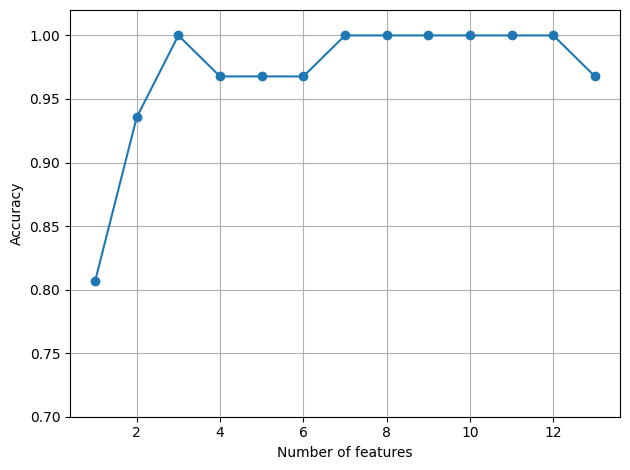

In [60]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
# 특성 선택
sbs = SBS(knn, k_features=1)
sbs.fit(X_train_std,y_train)
# 선택한 특성의 성능을 출력
k_feat = [ len(k) for k in sbs.subsets_]

plt.plot(k_feat, sbs.scores_, marker='o')
plt.ylim([0.7,1.02])
plt.ylabel('Accuracy')
plt.xlabel("Number of features")
plt.grid()
plt.tight_layout()
plt.show()

In [75]:
k3 = list(sbs.subsets_[10])
df_wine.columns[1:][k3]

Index(['Alcohol', 'Malic acid', 'OD280/OD315 of diluted wines'], dtype='object')

In [76]:
knn.fit(X_train_std,y_train)
knn.score(X_train_std,y_train), knn.score(X_test_std, y_test)

(0.967741935483871, 0.9629629629629629)

In [77]:
knn.fit(X_train_std[:,k3],y_train)
knn.score(X_train_std[:,k3],y_train), knn.score(X_test_std[:,k3], y_test)

(0.9516129032258065, 0.9259259259259259)

랜덤 포레스트의 특성 중요도 사용

Proline                         0.18545260453273973  
Flavanoids                      0.17475097557788732  
Color intensity                 0.14391990337231414  
OD280/OD315 of diluted wines    0.1361619442214559  
Alcohol                         0.11852941731789315  
Hue                             0.05873899628096849  
Total phenols                   0.05087242613744542  
Magnesium                       0.03135708460816904  
Malic acid                      0.025648355564265708  
Proanthocyanins                 0.02556987901932914  
Alcalinity of ash               0.0223659419376885  
Nonflavanoid phenols            0.013353928195970421  
Ash                             0.013278543233872913  


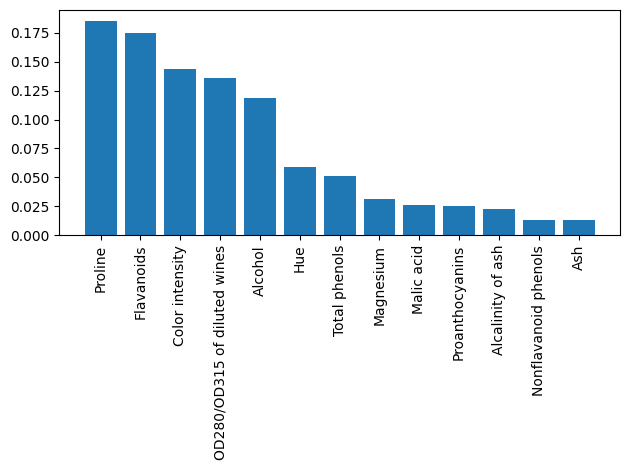

In [92]:
from sklearn.ensemble import RandomForestClassifier
feat_labels = df_wine.columns[1:]
forest = RandomForestClassifier(n_estimators=500, random_state = 1)
forest.fit(X_train,y_train)
importances =  forest.feature_importances_
indices =  np.argsort(importances)[::-1]  # 중요도가높은 순으로
for f in range(X_train.shape[1]):
   print(f"{feat_labels[indices[f]] : <30}  {importances[indices[f]]}  ")

plt.bar(range(X_train.shape[1]),  importances[indices] )
plt.xticks(range(X_train.shape[1]), feat_labels[indices], rotation=90  )
plt.tight_layout()
plt.show()

In [94]:
from sklearn.feature_selection import SelectFromModel  # 특성 선택을 위해 학습된 모델을 사용
sfm = SelectFromModel(forest, threshold=0.1, prefit=True)
X_selected = sfm.transform(X_train)
X_selected.shape[1]

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


5

In [99]:
for f in range(X_selected.shape[1]):
  print(f"{feat_labels[indices[f]] : <30} {importances[indices[f]]}")


Proline                        0.18545260453273973
Flavanoids                     0.17475097557788732
Color intensity                0.14391990337231414
OD280/OD315 of diluted wines   0.1361619442214559
Alcohol                        0.11852941731789315
